In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import master_ROCKE3D as mr
import os, glob

from matplotlib import gridspec, colorbar, colors
from netCDF4 import Dataset

In [2]:
def sorter(filename):
    """
    Get an item from the list (one-by-one) and return a score for that item.
    Sorts based on PXXX in the .nc filename which occurs at the 17th-21st index for the files I'm looking at
    """
    return filename[17:21]

In [3]:
insolation = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]

Testing diff_var_ROCKE3D:

Text(0.5, 1.0, 'TEMPERATURE AT 500mb VS SURFACE AIR TEMPERATURE')

C:\Users\ylinh\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


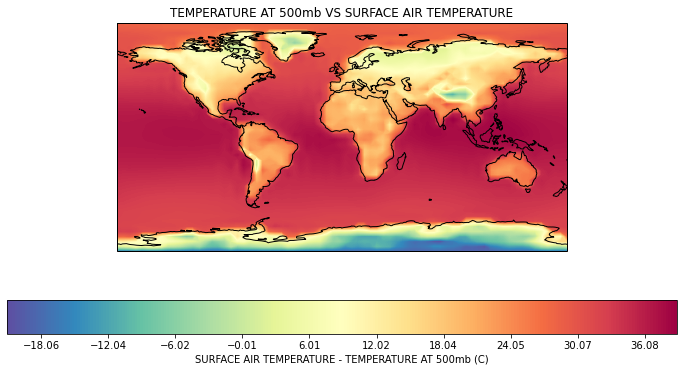

In [4]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
file1 = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
file2 = 'amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc'
var1 = 't_500'
var2 = 'tsurf'

data = Dataset(path + file1,'r')

lat = np.array(data['lat'])
lon = np.array(data['lon'])
lonGrid, latGrid = np.meshgrid(lon, lat)

var_a = np.array(data[var1])
var_b = np.array(data[var2])
var_diff = var_b - var_a

if data[var1].units != data[var2].units:
    print('Caution: var1 and var2 do not share units')
else: 
    pass

if not np.any(var_diff) == True:
    print('Error: var2 - var1 equals zero! Both are probably zero')
else:
    pass

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.grid(True)

c1 = ax.contourf(lonGrid, latGrid, var_diff, levels=np.linspace(np.min(var_diff), np.max(var_diff),1000), cmap='Spectral_r')
fig.colorbar(c1,label=(data[var2].long_name+' - '+data[var1].long_name+
                       ' ('+ data[var1].units+')'), orientation="horizontal")
ax.coastlines()

ax.set_title(data[var1].long_name+' VS '+data[var2].long_name)

In [5]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
file1 = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
file2 = 'amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc'
var1 = 't_500'
var2 = 'tsurf'

mr.diff_var_ROCKE3D(path, file1, var1, var2)
# this is supposed to output plots but I commented them out in master_ROCKE3D.py

(array([[-18.991318  , -18.991318  , -18.991318  , ..., -18.991318  ,
         -18.991318  , -18.991318  ],
        [  0.93217087,   1.9998837 ,   3.0916538 , ...,  -2.6099892 ,
          -2.919941  ,  -0.93987465],
        [ 11.5865965 ,  12.32909   ,  10.594713  , ...,  12.474869  ,
          15.997381  ,  15.744748  ],
        ...,
        [ 29.832693  ,  29.772053  ,  29.653929  , ...,  29.718119  ,
          29.837774  ,  29.852795  ],
        [ 28.73547   ,  28.711548  ,  28.643402  , ...,  28.695045  ,
          28.709944  ,  28.730425  ],
        [ 27.94565   ,  27.94565   ,  27.94565   , ...,  27.94565   ,
          27.94565   ,  27.94565   ]], dtype=float32),
 array([[-90., -90., -90., ..., -90., -90., -90.],
        [-86., -86., -86., ..., -86., -86., -86.],
        [-82., -82., -82., ..., -82., -82., -82.],
        ...,
        [ 82.,  82.,  82., ...,  82.,  82.,  82.],
        [ 86.,  86.,  86., ...,  86.,  86.,  86.],
        [ 90.,  90.,  90., ...,  90.,  90.,  90.]], dt

In [6]:
path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
file1 = 'amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc'
file2 = 'amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc'
var1 = 'wtrcld'
var2 = 'icecld'

mr.diff_var_ROCKE3D(path, file1, var1, var2)

Error: var2 - var1 equals zero! They are probably empty


Test plotting

In [7]:
# Can change AIJ and X064 for the relevant files. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var1 = 'wtrcld'
var2 = 'icecld'

for i in files:
    mr.diff_var_ROCKE3D(path, i, var1, var2)

S0X = 1.0 for amANN0990-0999.aijP211eoDOFP3Od_X064_O30.nc
S0X = 1.1 for amANN0990-0999.aijP212eoDOFP3Od_X064_O30.nc
S0X = 1.2 for amANN0990-0999.aijP213eoDOFP3Od_X064_O30.nc
S0X = 1.3 for amANN0990-0999.aijP214eoDOFP3Od_X064_O30.nc
S0X = 1.4 for amANN0990-0999.aijP215eoDOFP3Od_X064_O30.nc
S0X = 1.5 for amANN0990-0999.aijP216eoDOFP3Od_X064_O30.nc
S0X = 1.7 for amANN0990-0999.aijP217eoDOFP3Od_X064_O30.nc
S0X = 1.9 for amANN0990-0999.aijP219eoDOFP3Od_X064_O30.nc
S0X = 2.1 for amANN0990-0999.aijP221eoDOFP3Od_X064_O30.nc
S0X = 2.3 for amANN1490-1499.aijP223eoDOFP3Od_X064_O30.nc
S0X = 2.5 for amANN1490-1499.aijP227eoDOFP3Od_X064_O30.nc
S0X = 2.7 for amANN1690-1699.aijP225eoDOFP3Od_X064_O30.nc
S0X = 2.9 for amANN1990-1999.aijP229eoDOFP3Od_X064_O30.nc


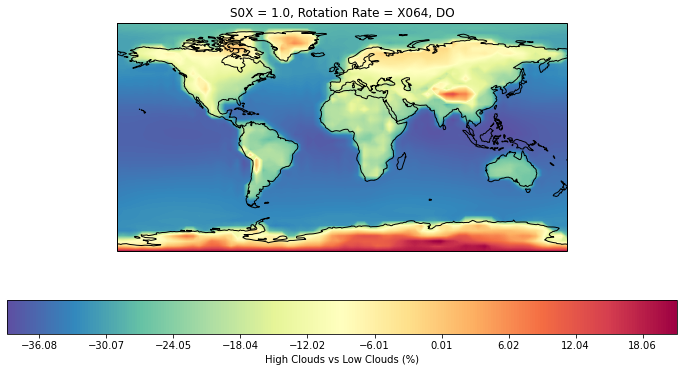

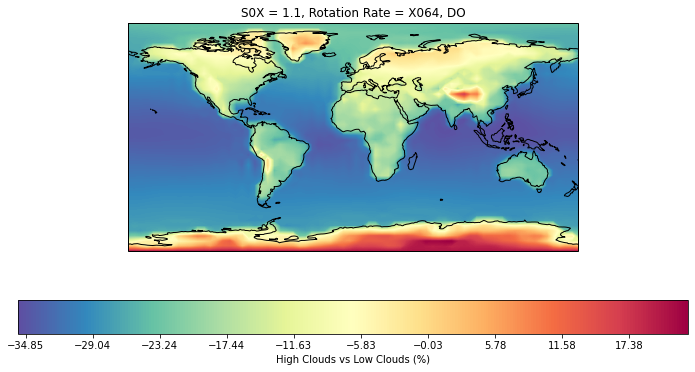

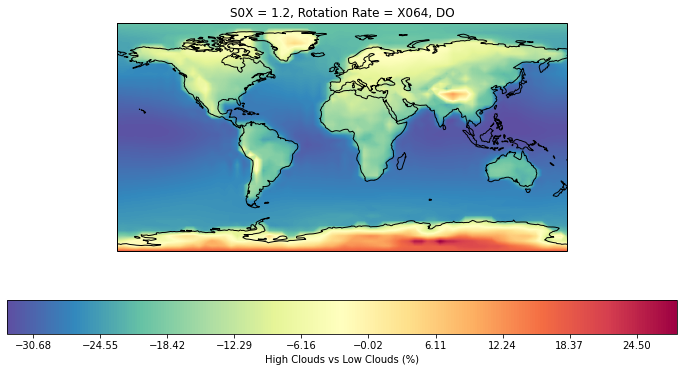

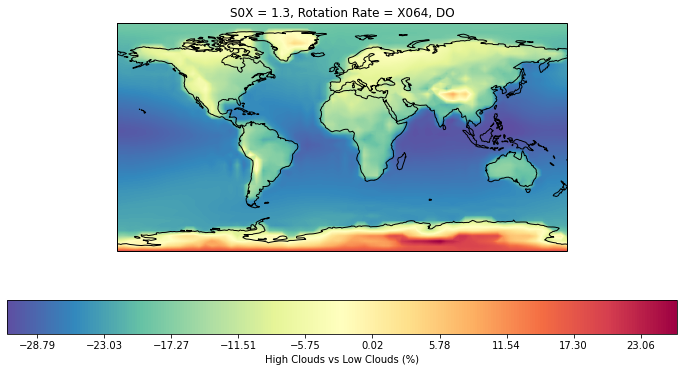

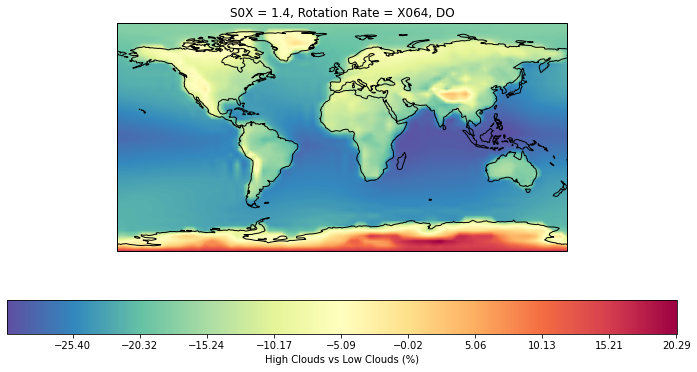

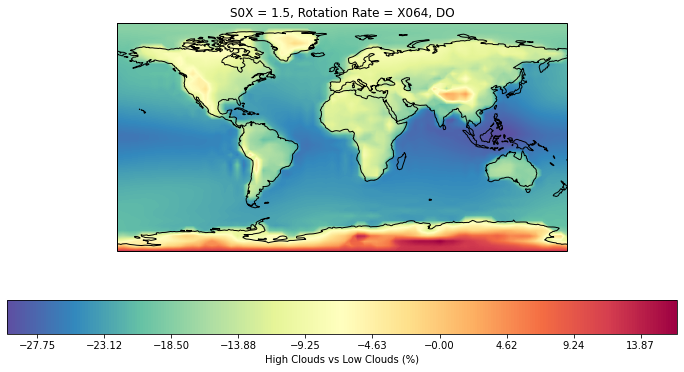

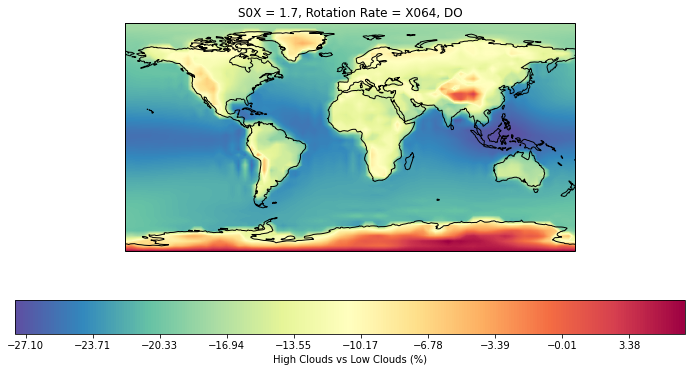

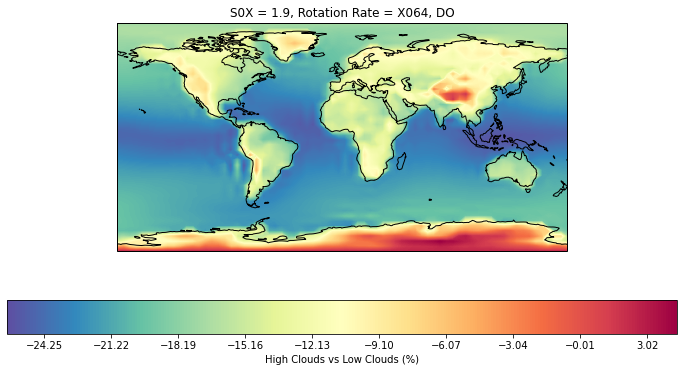

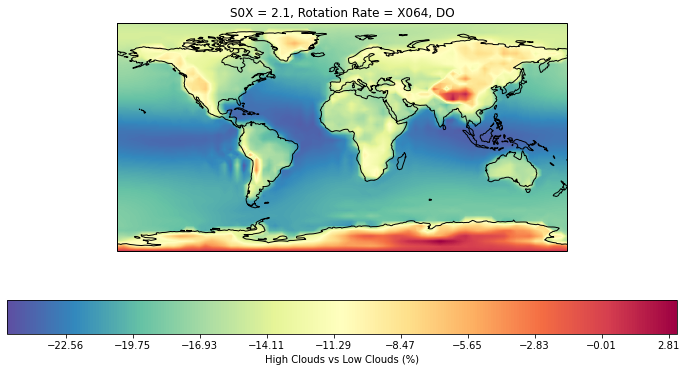

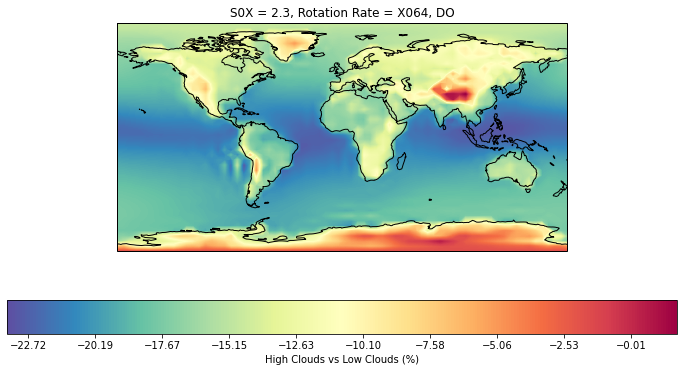

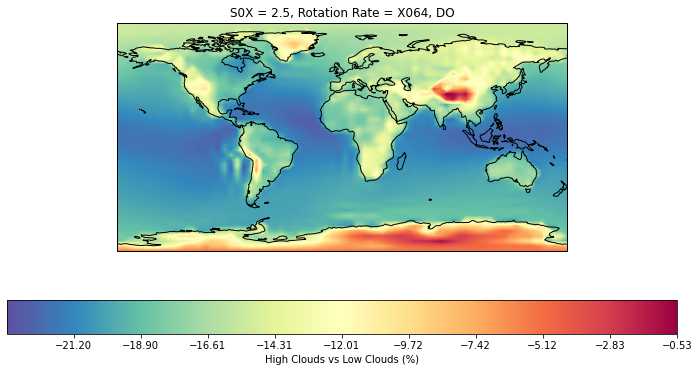

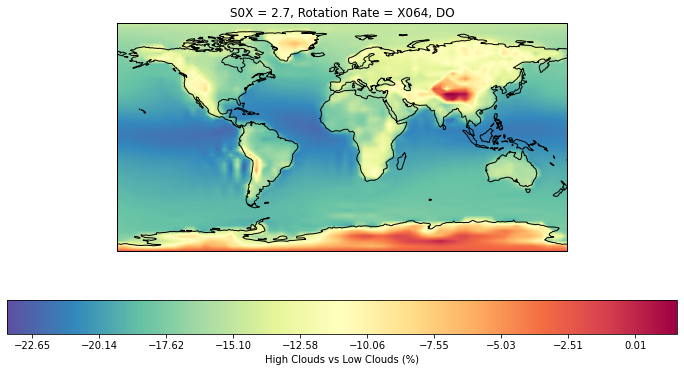

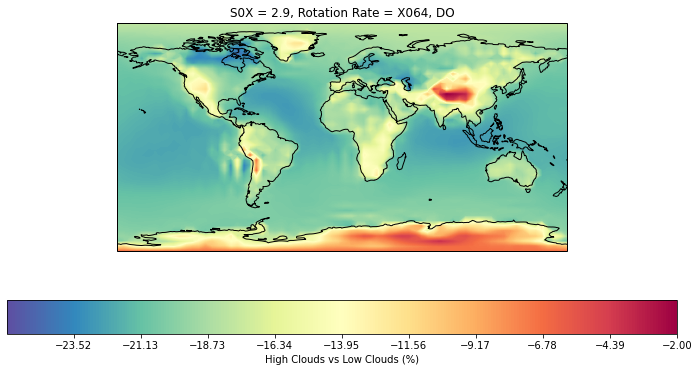

In [8]:
# Can change AIJ and X064 for the relevant files. Looking for constant rotation in AIJ directory here
# Can be helpful to look at indvidual output before setting min/max values for colorbar
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'tsurf'
var2 = 't_500'

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
    print('S0X = '+str(insolation[i])+' for '+ str(files[i]))
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.grid(True)
    c1 = ax.contourf(lonGrid, latGrid, var_diff, levels=np.linspace(np.min(var_diff), np.max(var_diff),1000), cmap='Spectral_r')
    fig.colorbar(c1,label='High Clouds vs Low Clouds (%)', orientation="horizontal")
    ax.coastlines()
    ax.set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# Plotting + code looks good, now go through other variables

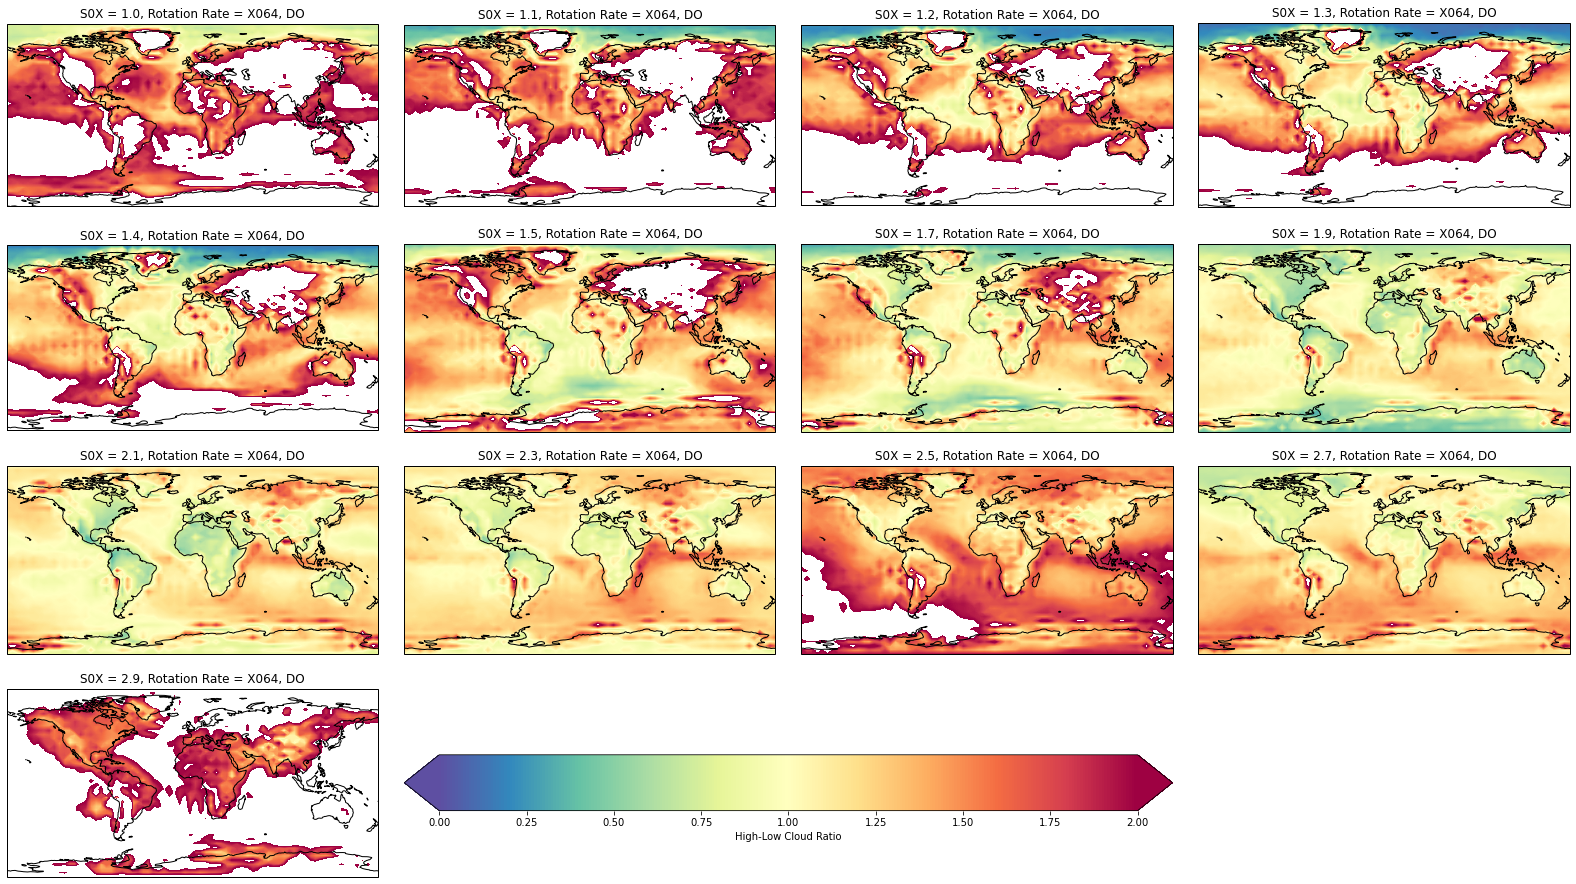

In [9]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = 0 # for contour levels and colorbar
max_val = 2

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldl'
var2 = 'pcldh'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.ratio_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label('High-Low Cloud Ratio')

plt.show()

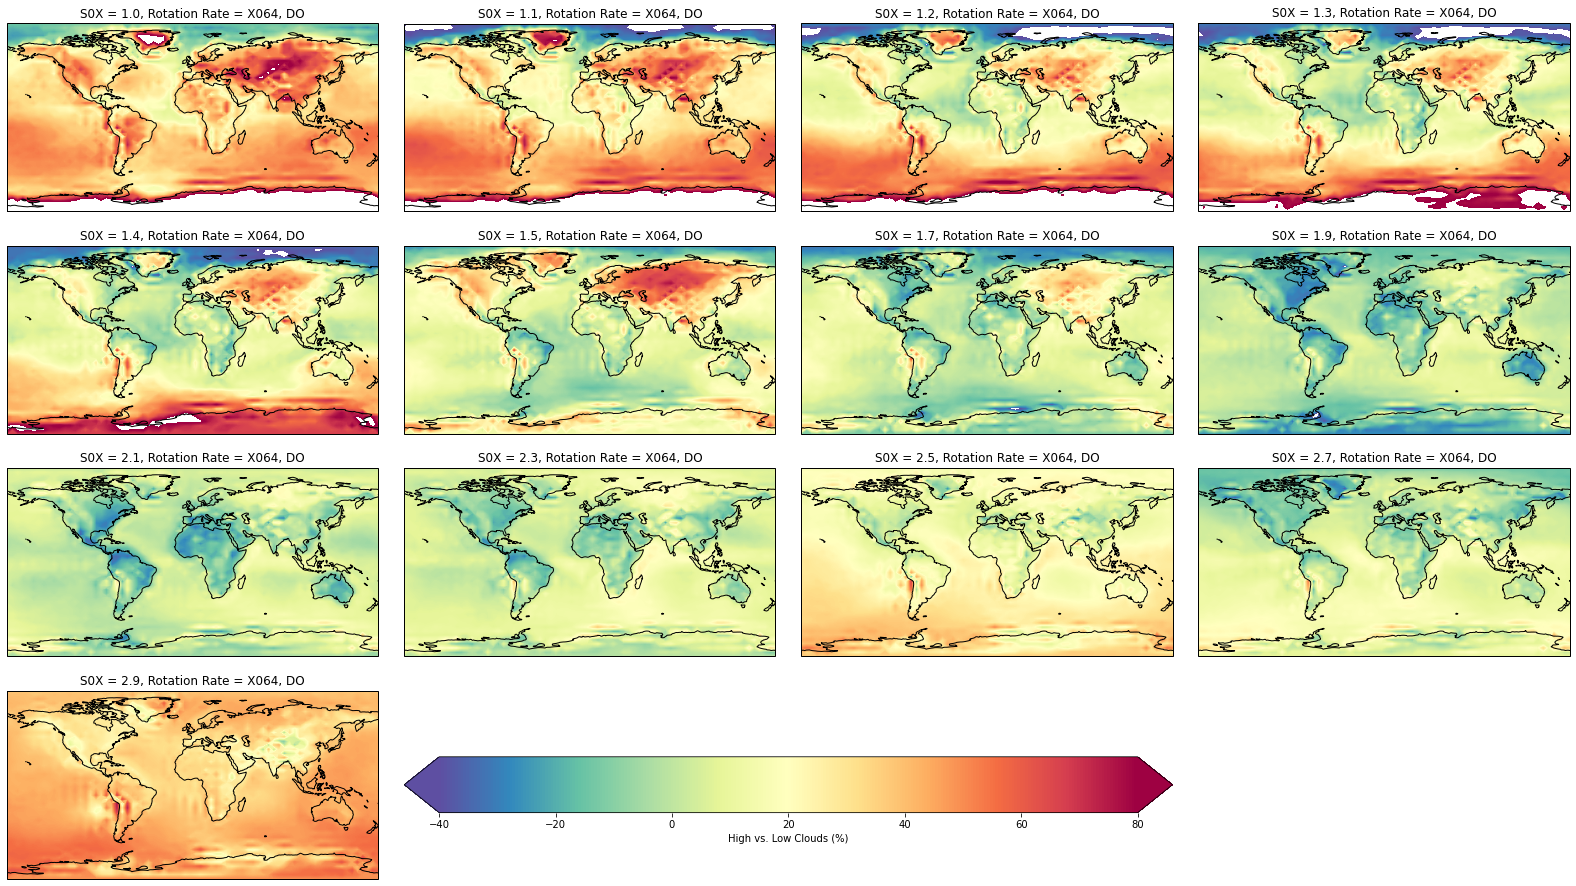

In [10]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -40 # for contour levels and colorbar
max_val = 80

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldl'
var2 = 'pcldh'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),norm=norm,
                             orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label('High vs. Low Clouds (%)') # and change this!

plt.show()

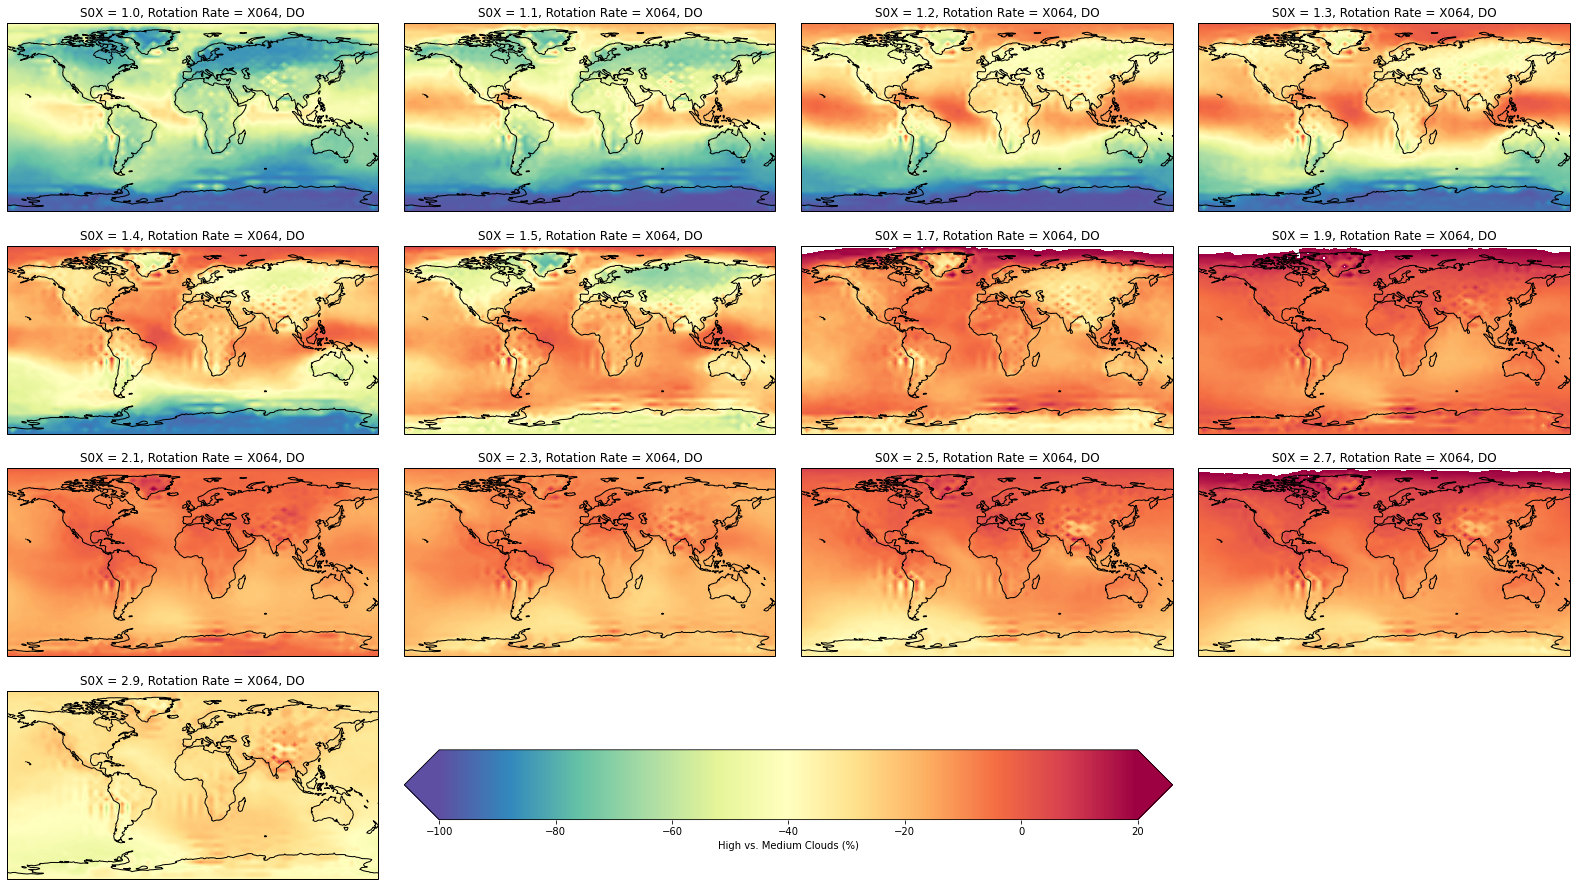

In [11]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -100 # for contour levels and colorbar
max_val = 20

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldh'
var2 = 'pcldm'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.1)
cbar.set_label('High vs. Medium Clouds (%)')

plt.show()

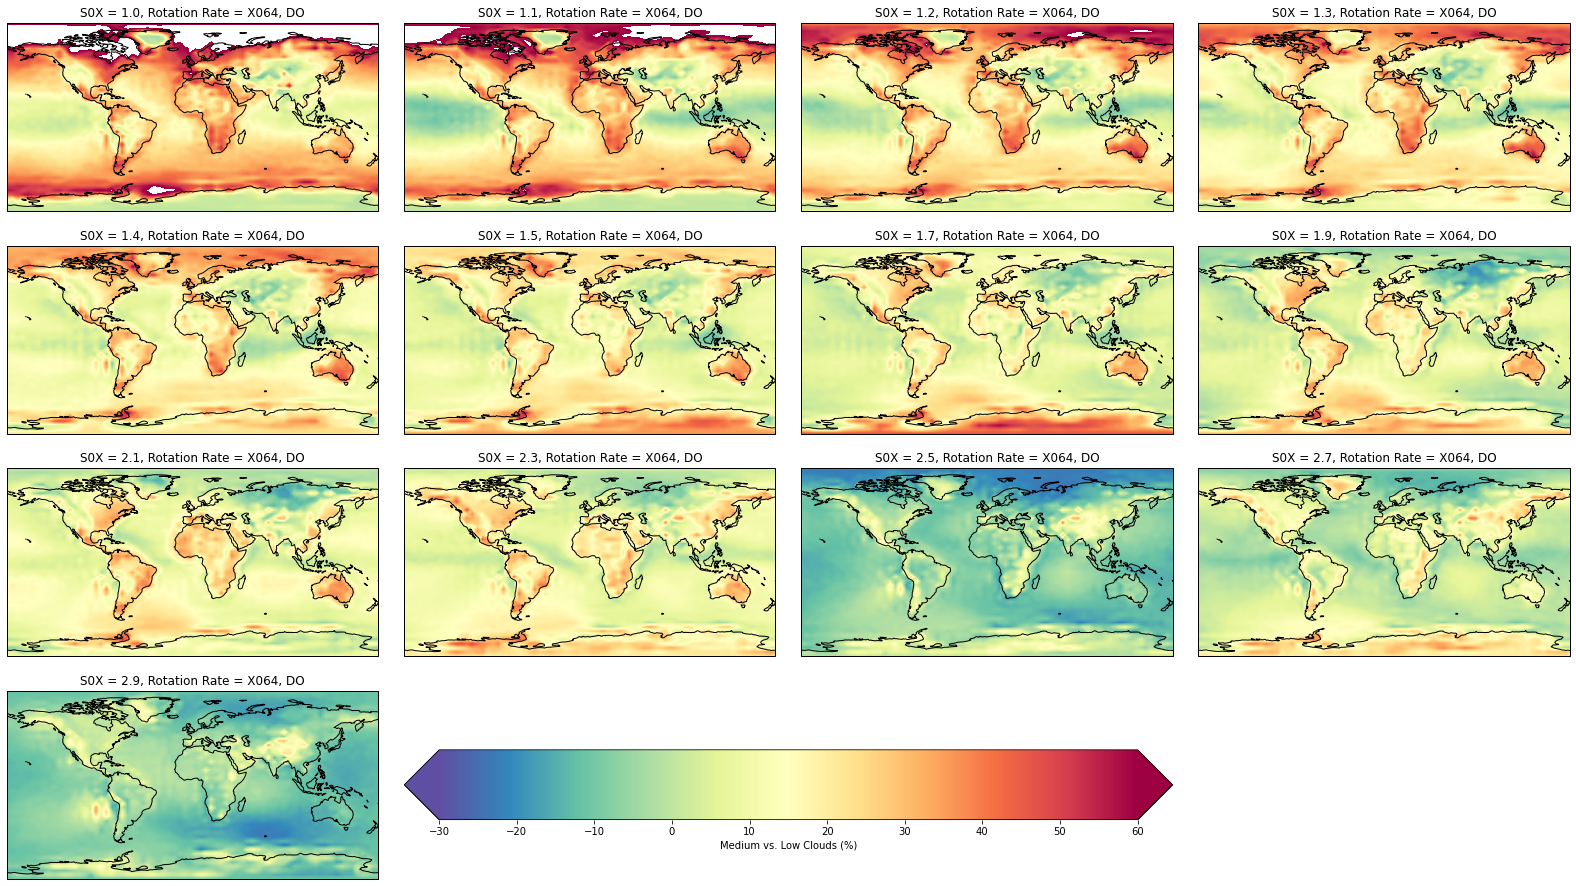

In [12]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -30 # for contour levels and colorbar
max_val = 60

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldm'
var2 = 'pcldl'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.1)
cbar.set_label('Medium vs. Low Clouds (%)')

plt.show()

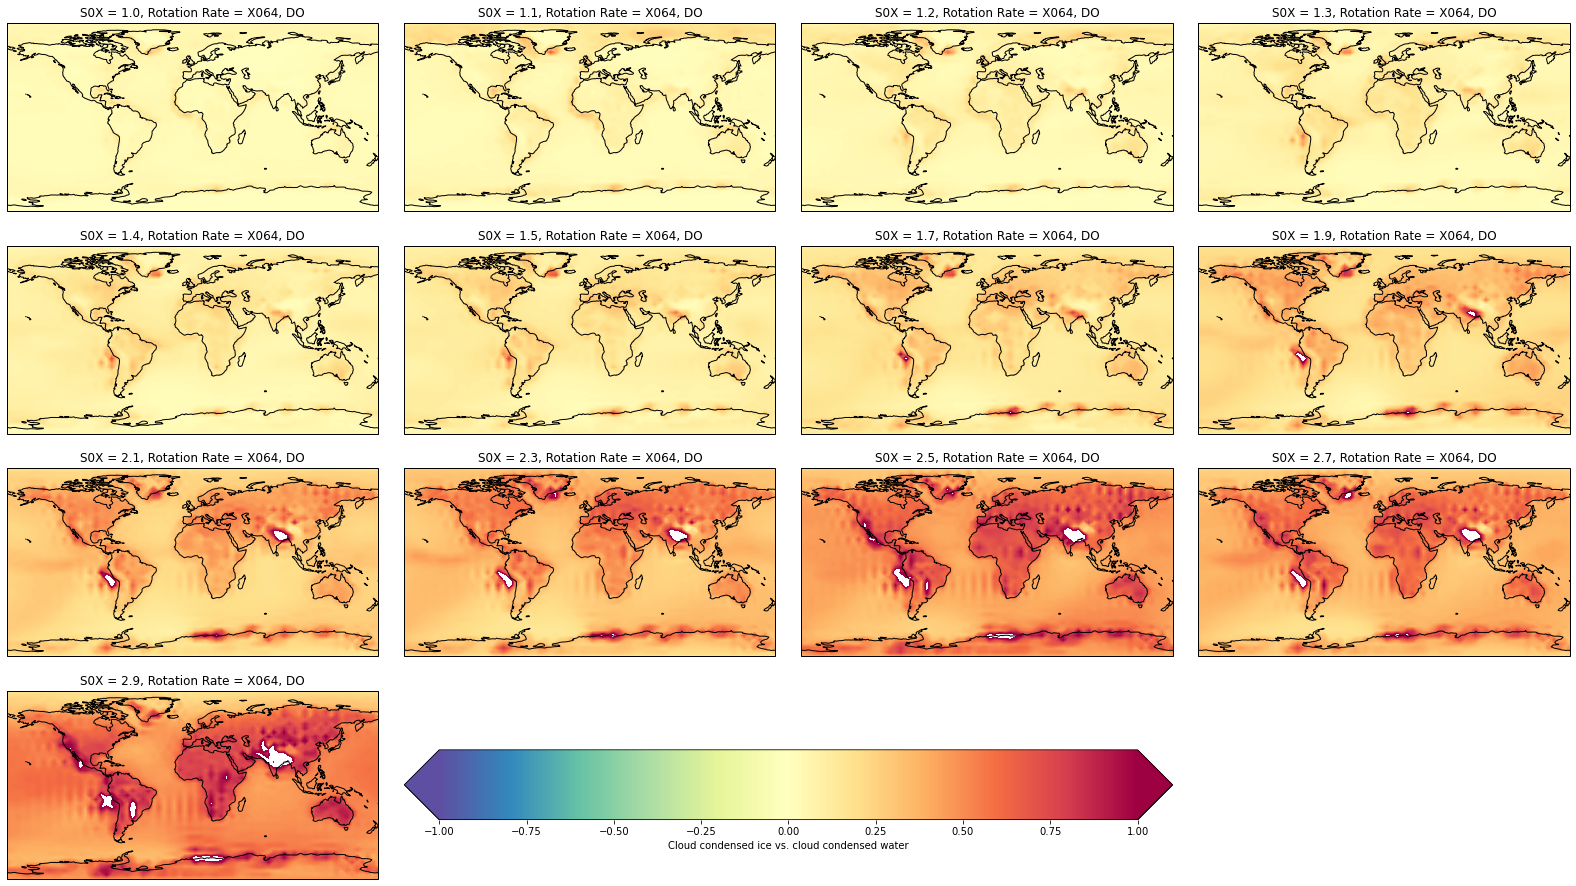

In [13]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -1 # for contour levels and colorbar
max_val = 1

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'cldi'
var2 = 'cldw'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.1)
cbar.set_label('Cloud condensed ice vs. cloud condensed water')

plt.show()

In [ ]:
open_ROCKE3D(path, filename, var)

Caution: var1 and var2 do not share units!


ValueError: 'bboxes' cannot be empty

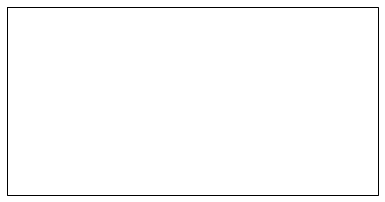

In [14]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -120 # for contour levels and colorbar
max_val = -20

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldt'
var2 = 'tsurf'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.ratio_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),
                             norm=norm,orientation='horizontal',extend='both')
cbar.ax.set_aspect(.1)
cbar.set_label('Total cloud cover vs. surface temperature')

plt.show()

In [ ]:
# Can change AIJ and X064 for the relevant directory and filenames. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJL/*X064*.nc')]
files = sorted(files, key=sorter)

fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(4, 4)
gs.update(hspace=.1, wspace=.07)
ax = []

## Change these
min_val = -40 # for contour levels and colorbar
max_val = 80

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJL/'
var1 = 'wtrcld'
var2 = 'icecld'
####################

for i in range(len(files)):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, files[i], var1, var2)
#     print('S0X = '+str(insolation[i])+' for '+ str(files[i]))

    ax.append(plt.subplot(gs[i], projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(min_val, max_val,1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

# plot colorbar
ax.append(plt.subplot(gs[3, 1:3]))
norm = mpl.colors.Normalize(vmin=min_val, vmax=max_val)
cbar = colorbar.ColorbarBase(ax[i+1],cmap=plt.get_cmap('Spectral_r'),norm=norm,
                             orientation='horizontal',extend='both')
cbar.ax.set_aspect(.08)
cbar.set_label('Water vs. Ice Clouds (%)') # and change the label!

plt.show()

# Old plotting attempts which don't rely on gridspec. May make it more easier/flexible

In [ ]:
# Can change AIJ and X064 for the relevant files. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldh'
var2 = 'pcldl'

fig = plt.figure(figsize=(28, 16))
rows = 4
columns = 4
ax = []

for i, file in enumerate(files):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, file, var1, var2)
#     print(files[i])
#     print(insolation[i])
    
    ax.append(plt.subplot(rows, columns, i + 1,projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(np.min(var_diff), np.max(var_diff),1000), cmap='Spectral_r')
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')
    ax[i].coastlines()
    
plt.show()

In [ ]:
# Can change AIJ and X064 for the relevant files. Looking for constant rotation in AIJ directory here
files = [os.path.basename(file) for file in glob.glob('AIJ/*X064*.nc')]
files = sorted(files, key=sorter)

path = 'C:/Users/ylinh/OneDrive - UW/Exoplanetary Atmospheres/AIJ/'
var1 = 'pcldh'
var2 = 'pcldl'

fig, ax = plt.subplots(4,4, figsize=(28, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.25, wspace=.8)

for i, file in enumerate(files):
    var_diff, latGrid, lonGrid = mr.diff_var_ROCKE3D(path, file, var1, var2)
    print(files[i])
    print(insolation[i])
    
    ax.append(plt.add_subplot(rows, columns, i + 1,projection=ccrs.PlateCarree()))
    ax[i].contourf(lonGrid, latGrid, var_diff, levels=np.linspace(np.min(var_diff), np.max(var_diff),1000), cmap='Spectral_r')
    ax[i].coastlines()
    ax[i].set_title('S0X = '+str(insolation[i])+', Rotation Rate = X064, DO')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)